In [3]:
# import des packages nécessaires à l'exécution du code 

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_model = pd.read_csv('data_cleaned.csv')

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.77803e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.84239e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.22232e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.59103e-19): result may not be accurate.
 

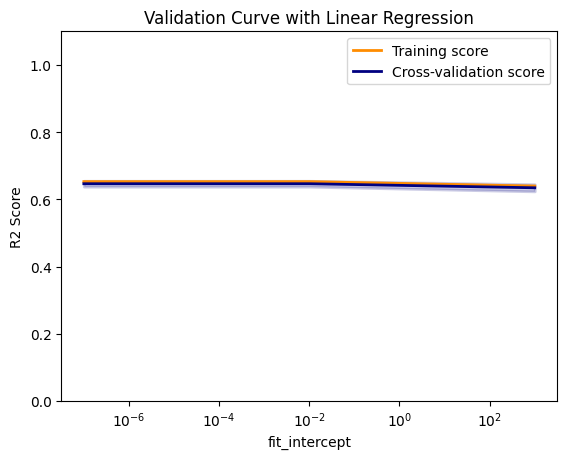

In [12]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression

# Définition de la plage de valeurs pour l'hyperparamètre
param_range = np.logspace(-7,3,3)

# Création du modèle
model = Ridge()

# Calcul des scores pour chaque valeur de l'hyperparamètre
train_scores, test_scores = validation_curve(
    model, X, y, param_name="alpha", param_range=param_range,
    scoring="r2", n_jobs=-1)

# Calcul des moyennes et des écarts-types des scores de validation croisée
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé de la courbe de validation croisée
plt.title("Validation Curve with Linear Regression")
plt.xlabel("fit_intercept")
plt.ylabel("R2 Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

        


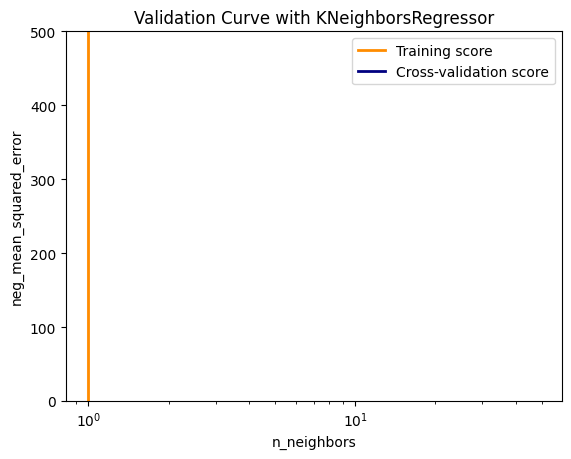

In [17]:
X = df_model.drop(['date','price','id','lat','long'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression

# Définition de la plage de valeurs pour l'hyperparamètre
param_range = np.arange(1,50)

# Création du modèle
model = KNeighborsRegressor()

# Calcul des scores pour chaque valeur de l'hyperparamètre
train_scores, test_scores = validation_curve(
    model, X, y, param_name="n_neighbors", param_range=param_range,
    scoring="neg_mean_squared_error", n_jobs=-1)

# Calcul des moyennes et des écarts-types des scores de validation croisée
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracé de la courbe de validation croisée
plt.title("Validation Curve with KNeighborsRegressor")
plt.xlabel("n_neighbors")
plt.ylabel("neg_mean_squared_error")
plt.ylim(0.0, 500)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()



